In [18]:
import numpy as np
#import sys
#sys.path.append("../")
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
import itertools
import datetime

## Loading data
### Remember that 1 means PD

In [19]:
data = pd.read_csv("../dataset/parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Defining X and y

In [20]:
c = 0
for i in data.columns:
    print c, i 
    c+=1

0 name
1 MDVP:Fo(Hz)
2 MDVP:Fhi(Hz)
3 MDVP:Flo(Hz)
4 MDVP:Jitter(%)
5 MDVP:Jitter(Abs)
6 MDVP:RAP
7 MDVP:PPQ
8 Jitter:DDP
9 MDVP:Shimmer
10 MDVP:Shimmer(dB)
11 Shimmer:APQ3
12 Shimmer:APQ5
13 MDVP:APQ
14 Shimmer:DDA
15 NHR
16 HNR
17 status
18 RPDE
19 DFA
20 spread1
21 spread2
22 D2
23 PPE


In [21]:
print "total PD", data.status.values.tolist().count(1)
print "total no PD", data.status.values.tolist().count(0)
# as the number of PD and no PD is hugely different, resampling to get even amounts
pd_index = data.index[data.loc[:, "status"]==1]
nopd_index = data.index[data.loc[:, "status"]==0]
print pd_index.shape
print nopd_index.shape
#making data more even
my_index = np.hstack((pd_index[:48], nopd_index))
print my_index.shape

total PD 147
total no PD 48
(147,)
(48,)
(96,)


In [22]:
#X = scale(data.values[:, 1:].astype(np.float64)) #data[data.columns[[1, 2, 3]]].values
#y = data.status.values.astype(np.float64)#.reshape(-1,1)

################################################################################################
X = scale(data.values[my_index, 1:].astype(np.float64)) #data[data.columns[[1, 2, 3]]].values
y = data.status.values.astype(np.float64)[my_index]#.reshape(-1,1)
print X.shape, y.shape

(96, 23) (96,)


## Statistics

In [23]:
#note to self: making the data more evenly distribuited among pd and no pd
# actually changed the look of this coefficient
print "Pearson coefficient:"
bests = np.zeros(X.shape[1])
for i in xrange(X.shape[1]):
    #val = np.cov(X[:, i], y).astype(np.float64)
    val = np.corrcoef(X[:, i], y)
    bests[i] = abs(val[0,1])


    #norm = (val/np.array([[val[0,0], val[0,0]], [val[1,1], val[1,1]] ]))
    #print norm.round(2), "\n"
    
    #plt.imshow(val)
    
    #print data.columns[1:][i]
    #plt.title("%s  %s"%(data.columns[1:][i], i) )
    #plt.show()
    #print val #.round(4)
    #print"\n=====================================\n"
order = np.argsort(bests)[::-1]

for i in order:
    print  i, data.columns[1:][i], bests[i]

Pearson coefficient:
16 status 1.0
19 spread1 0.6786027185520599
22 PPE 0.6712205393983095
12 MDVP:APQ 0.592946008573676
4 MDVP:Jitter(Abs) 0.5529667925042717
20 spread2 0.5488324221114637
8 MDVP:Shimmer 0.524457174908963
9 MDVP:Shimmer(dB) 0.5193307273538714
6 MDVP:PPQ 0.5095459184236945
11 Shimmer:APQ5 0.497962414385354
3 MDVP:Jitter(%) 0.46963866188195513
13 Shimmer:DDA 0.4660487210872023
10 Shimmer:APQ3 0.46604050733622504
0 MDVP:Fo(Hz) 0.4575383793200252
7 Jitter:DDP 0.44672724784285434
5 MDVP:RAP 0.4466343099746806
2 MDVP:Flo(Hz) 0.43587872380483816
18 DFA 0.4242564245997247
15 HNR 0.3572187793464325
1 MDVP:Fhi(Hz) 0.3213329556017799
21 D2 0.3153090109318031
17 RPDE 0.29867882871862916
14 NHR 0.12187991111085425


(67, 4) (14, 4) (15, 4)
(67,) (14,) (15,)


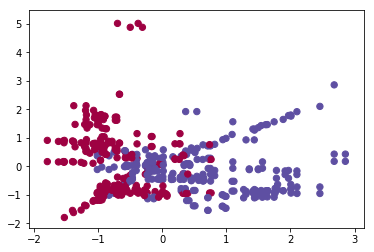

In [24]:
#15% for test, 15% for validating and 70% for training 
##seeding

np.random.seed(0)#0
X_data = X[:, [22, 19, 0, 1]] #X[:, [22, 21, 20, 19]]  #X[:, [0,1,2]] 
myray = np.arange(X_data.shape[0])
np.random.shuffle(myray)


X_train = X_data[myray[:int(0.7*X_data.shape[0])],:]
X_test = X_data[myray[int(0.7*X_data.shape[0]):int(0.85*X_data.shape[0])],:]
X_validation = X_data[myray[int(0.85*X_data.shape[0]):],:]


y_train = y[myray[:int(0.7*X.shape[0])]]
y_test = y[myray[int(0.7*X.shape[0]):int(0.85*X.shape[0])]]
y_validation = y[myray[int(0.85*X.shape[0]):]]

print X_train.shape, X_test.shape, X_validation.shape
print y_train.shape, y_test.shape, y_validation.shape

plt.scatter(X_data[:,0], X_data[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.scatter(X_data[:,0], X_data[:,2], s=40, c=y, cmap=plt.cm.Spectral)
plt.scatter(X_data[:,0], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)
#plt.scatter(X_data[:,0], X_data[:,4], s=40, c=y, cmap=plt.cm.Spectral)

plt.scatter(X_data[:,1], X_data[:,2], s=40, c=y, cmap=plt.cm.Spectral)
plt.scatter(X_data[:,1], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)
#plt.scatter(X_data[:,1], X_data[:,4], s=40, c=y, cmap=plt.cm.Spectral) 

#plt.scatter(X_data[:,2], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)
#plt.scatter(X_data[:,2], X_data[:,4], s=40, c=y, cmap=plt.cm.Spectral)

#plt.scatter(X_data[:,4], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)

plt.show()

## Training and validating

In [25]:
clf = GaussianNB()
%time clf.fit(X_train, y_train)
print "Training Error: ", 1 - clf.score(X_train, y_train)

pred =  clf.predict(X_validation)
 
print "Validation Score: ", clf.score(X_validation, y_validation) 



CPU times: user 1.82 ms, sys: 721 µs, total: 2.54 ms
Wall time: 1.92 ms
Training Error:  0.28358208955223885
Validation Score:  0.8666666666666667


## Looking for the best

## Test

In [26]:
pred = clf.predict(X_test)
print "Test score:", clf.score(X_test, y_test)

Test score: 0.9285714285714286


## Confusion matrix

In [27]:
def plot_confusion_matrix(y_test, y_pred): 
    cnf_matrix = confusion_matrix(y_test, y_pred)
    classes = np.array(["No Parkinson", "Parkinson"])
    plt.clf()
    plt.close("all")
    plt.figure(figsize = (18,9))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix(Naive Bayes)')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #normalized
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, round(cnf_matrix[i, j], 3),
            horizontalalignment="center",
            color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()

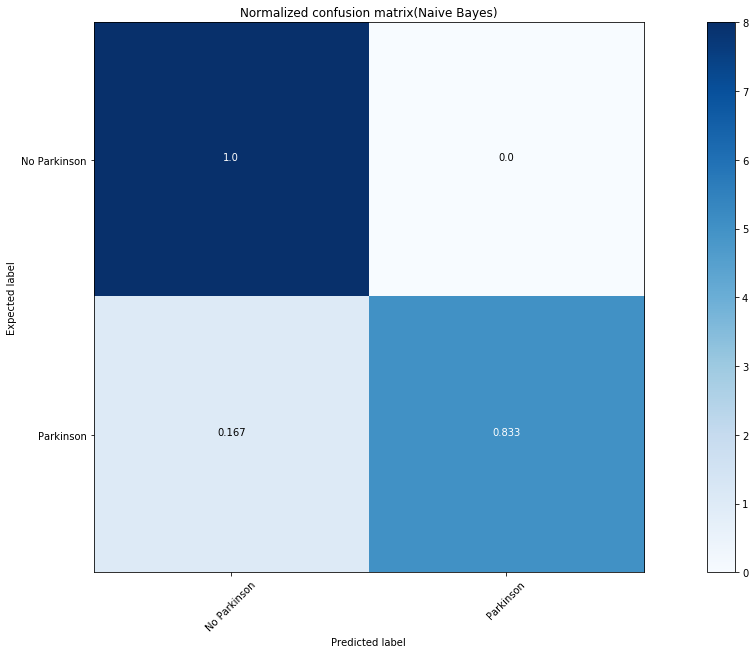

In [28]:
%matplotlib inline
plt.figure(figsize = (18,9))
plot_confusion_matrix(y_test, pred)